In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [3]:
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop

In [4]:
train_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Train" 
val_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Validation"
test_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test"

In [5]:
# transfer layer has fully connected layer in the top. Setting it false means I want to ignore this and get straight to the convulations

model = Xception(include_top=False,input_shape=(224, 224, 3), weights='imagenet')
input_shape = (224,224)

83689472/83683744 [==============================] - 1s 0us/step


In [6]:
# all image's pixel will be 0 to 1

datagen_train = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.01,
                                  zoom_range=[0.9, 1.25],
                                  horizontal_flip=True,
                                  vertical_flip=False)

datagen_val = ImageDataGenerator(rescale=1./255)

datagen_test = ImageDataGenerator(rescale=1./255)

In [7]:
batch_size = 16

# load data from its directory and subdirectory
# always point at the directory that contains sub directory

generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,                                                 
                                                    shuffle=True)

generator_val = datagen_val.flow_from_directory(directory=val_dir,
                                                target_size=input_shape,
                                                batch_size=batch_size,
                                                shuffle=False)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 4468 images belonging to 2 classes.
Found 639 images belonging to 2 classes.
Found 655 images belonging to 2 classes.


In [8]:
import os
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]

image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_test = path_join(test_dir, generator_test.filenames)

cls_train = generator_train.classes
cls_test = generator_test.classes


class_names = list(generator_train.class_indices.keys())
num_classes = generator_train.num_classes
num_classes

2

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
def print_layer_trainable():
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	input_1
True:	block1_conv1
True:	block1_conv1_bn
True:	block1_conv1_act
True:	block1_conv2
True:	block1_conv2_bn
True:	block1_conv2_act
True:	block2_sepconv1
True:	block2_sepconv1_bn
True:	block2_sepconv2_act
True:	block2_sepconv2
True:	block2_sepconv2_bn
True:	conv2d
True:	block2_pool
True:	batch_normalization
True:	add
True:	block3_sepconv1_act
True:	block3_sepconv1
True:	block3_sepconv1_bn
True:	block3_sepconv2_act
True:	block3_sepconv2
True:	block3_sepconv2_bn
True:	conv2d_1
True:	block3_pool
True:	batch_normalization_1
True:	add_1
True:	block4_sepconv1_act
True:	block4_sepconv1
True:	block4_sepconv1_bn
True:	block4_sepconv2_act
True:	block4_sepconv2
True:	block4_sepconv2_bn
True:	conv2d_2
True:	block4_pool
True:	batch_normalization_2
True:	add_2
True:	block5_sepconv1_act
True:	block5_sepconv1
True:	block5_sepconv1_bn
True:	block5_sepconv2_act
True:	block5_sepconv2
True:	block5_sepconv2_bn
True:	block5_sepconv3_act
True:	block5_sepconv3
True:	block5_sepconv3_bn
True:	add_3
Tr

**My codes stared**

**Visualizing Intermediate Representations**

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

**My Code ended**

In [11]:
transfer_layer = model.get_layer('block14_sepconv2_act')
conv_model = Model(inputs=model.input, outputs=transfer_layer.output)

**Inception er fully connected layer gula baad diye dichilam. So shobar last projonto jeta ache ota conv_model e save kore then amra nijera model create kore nibo**

In [12]:
#for layer in conv_model.layers:
#    layer.trainable = False
    
# Start a new Keras Sequential model.
new_model = Sequential()

# Add the convolutional part of the VGG16 model from above.
new_model.add(conv_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
# it makes the 224 x 224 into a linear array 
new_model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# dropout will remove some random num of neorons. this will prevent overweight
new_model.add(Dropout(0.5))

# assuming
new_model.add(Dense(1024, activation='relu'))

# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.
#new_model.add(Dense(512, activation='relu'))


# Add the final layer for the actual classification.
# as we detecting yes and no so num_class will be 2
new_model.add(Dense(num_classes, activation='softmax'))


In [13]:
# here you can adjust learning rate
optimizer = RMSprop(lr=0.0001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

# figure specification for training model

new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [14]:
def print_layer_trainable():
    for layer in new_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	functional_1
True:	flatten
True:	dropout
True:	dense
True:	dense_1


In [15]:
epochs = 10
# steps_per_epoch = 10
steps_per_epoch = generator_train.n / batch_size
steps_val = generator_val.n / batch_size
steps_test = generator_test.n / batch_size


history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
280/279 [==============================] - 1233s 4s/step - loss: 0.2445 - accuracy: 0.9326 - val_loss: 8.0010 - val_accuracy: 0.8275
Epoch 2/10
280/279 [==============================] - 104s 373ms/step - loss: 0.1175 - accuracy: 0.9705 - val_loss: 14.7344 - val_accuracy: 0.8580
Epoch 3/10
280/279 [==============================] - 103s 369ms/step - loss: 0.0736 - accuracy: 0.9812 - val_loss: 3.5084 - val_accuracy: 0.9328
Epoch 4/10
280/279 [==============================] - 103s 368ms/step - loss: 0.0685 - accuracy: 0.9872 - val_loss: 1.0862 - val_accuracy: 0.9664
Epoch 5/10
280/279 [==============================] - 103s 368ms/step - loss: 0.0536 - accuracy: 0.9884 - val_loss: 2.1885 - val_accuracy: 0.9557
Epoch 6/10
280/279 [==============================] - 103s 367ms/step - loss: 0.0661 - accuracy: 0.9933 - val_loss: 1.7679 - val_accuracy: 0.9695
Epoch 7/10
280/279 [=============================

In [16]:
result = new_model.evaluate_generator(generator_test, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test-set classification accuracy: 96.49%


In [17]:
import cv2
import os
from tqdm import tqdm

In [18]:
path = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test/Yes"

test_data = np.empty((1, 224, 224, 3))

for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
    try:
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (224, 224))  # resize to normalize data size
        
        #new_array = new_array.reshape((224, 224))
        
       
        new_array = new_array.reshape((-1, 224, 224, 3))
        #print(new_array.shape)
        test_data = np.append(test_data, new_array, axis = 0)  # add this to our training_data
    except Exception as e:  # in the interest in keeping the output clean...
        print(e)
        pass
        #except OSError as e:
        #    print("OSErrroBad img most likely", e, os.path.join(path,img))
        #except Exception as e:
        #    print("general exception", e, os.path.join(path,img))

100%|██████████| 229/229 [00:08<00:00, 26.33it/s]


In [19]:
test_data.shape

(230, 224, 224, 3)

In [20]:
scaled_data = test_data/255
new_model.predict_classes(scaled_data)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
path = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test/No"

test_data_2 = np.empty((1, 224, 224, 3))

for img_2 in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
    try:
        img_array_2 = cv2.imread(os.path.join(path,img_2))  # convert to array
        new_array_2 = cv2.resize(img_array_2, (224, 224))  # resize to normalize data size
        
        #new_array_2 = new_array.reshape((224, 224))
        
       
        new_array_2 = new_array_2.reshape((-1, 224, 224, 3))
        #print(new_array_2.shape)
        test_data_2 = np.append(test_data_2, new_array_2, axis = 0)  # add this to our training_data
    except Exception as e:  # in the interest in keeping the output clean...
        print(e)
        pass
        #except OSError as e:
        #    print("OSErrroBad img most likely", e, os.path.join(path,img))
        #except Exception as e:
        #    print("general exception", e, os.path.join(path,img))

100%|██████████| 426/426 [00:28<00:00, 15.17it/s]


In [22]:
test_data_2.shape

(427, 224, 224, 3)

In [23]:
scaled_data_2 = test_data_2/255
new_model.predict_classes(scaled_data_2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
# new_model.save('/content/drive/My Drive/CSE400/Saving Model/Xception')

<Figure size 432x288 with 0 Axes>

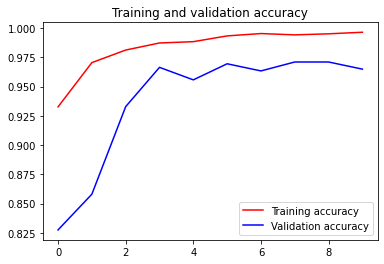

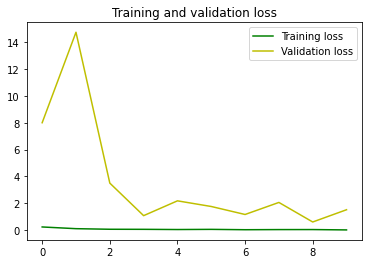

<Figure size 432x288 with 0 Axes>

In [25]:


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[   'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------


plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [26]:
# import os, signal

# os.kill(     os.getpid() , 
#          signal.SIGKILL
#        )

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0